Importation of modules and functions
===

In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

# Functions
from implementations import *
from helpers import *

#the autoreload
%load_ext autoreload
%autoreload 2

Data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Data filtering and standardization
===

In [3]:
data_, labels, ids, idx_colrem = process_data(data_raw, labels_raw, ids_raw)
data, means, variance = standardize(data_)

The original dimensions of the training data set was 250000 samples and 30 columns. After feature and sample filtering, there are 223877 samples and 23 columns


Splitting into train and test set
===

In [4]:
X_train, y_train, X_test, y_test = split_data(data, labels)

print('Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values' +
      ' are split for testing and training sets with the ratio of 0.8')

Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values are split for testing and training sets with the ratio of 0.8


In [5]:
print(data.shape)
print(X_train.shape)
print(X_test.shape)

(223877, 23)
(179101, 23)
(44776, 23)


Linear regression with gradient descent (GD)
===

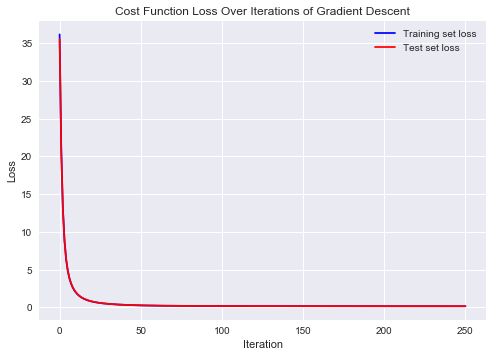

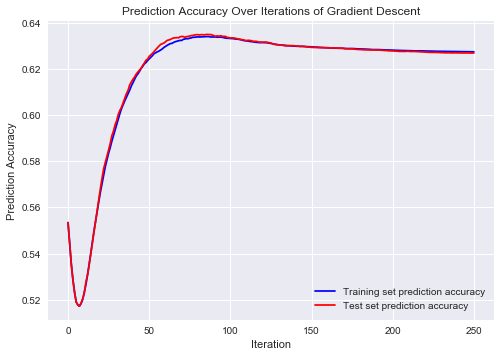

In [6]:
initial_w = np.ones(X_train.shape[1])
losses, ws = least_squares_GD(y_train, X_train, initial_w, max_iters = 250) # fit model and retrieve W's across iterations
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, method = 'MSE'), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cost Function Loss Over Iterations of Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Prediction Accuracy Over Iterations of Gradient Descent')
plt.show()


Linear regression with stochastic gradient descent (SGD)
===

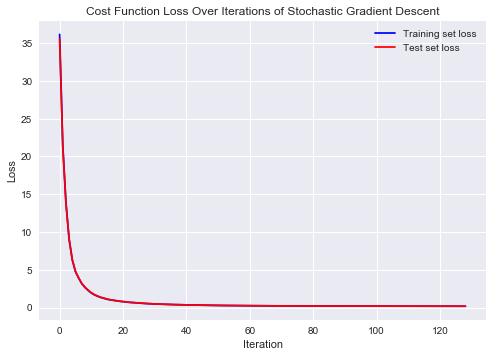

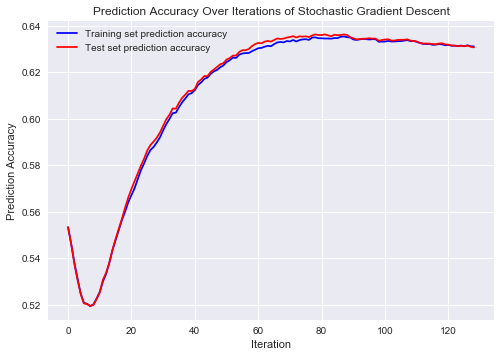

In [7]:
initial_w = np.ones(X_train.shape[1])
losses, ws = least_squares_SGD(y_train, X_train, initial_w, max_iters = 250) # fit model, retrieve parameters ws
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, method = 'MSE'), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cost Function Loss Over Iterations of Stochastic Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Prediction Accuracy Over Iterations of Stochastic Gradient Descent')
plt.show()


Linear regression using least squares normal equations
===

In [8]:
w = least_squares(y_train, X_train)

pred_y = predict_labels(w, X_test)
pred_accuracy(pred_y,y_test)

0.6253573342862248

Linear regression using the normal equations with additional polynomial degrees
===

degree: 1 	 rmse_ts: 0.4356411229754294 	  pred_ts: 0.7127255672681794
degree: 2 	 rmse_ts: 0.6539512754152845 	  pred_ts: 0.7505360014293372
degree: 3 	 rmse_ts: 4.329244723875194 	  pred_ts: 0.7632437019832052
degree: 4 	 rmse_ts: 36.13025616265787 	  pred_ts: 0.7717973914597106
degree: 5 	 rmse_ts: 278.17871520436813 	  pred_ts: 0.7750804002144006
degree: 6 	 rmse_ts: 1947.5548956806315 	  pred_ts: 0.7765320707521887
degree: 7 	 rmse_ts: 32218.76590920095 	  pred_ts: 0.784639092370913
degree: 8 	 rmse_ts: 2132966.7397510884 	  pred_ts: 0.7936617830980882
degree: 9 	 rmse_ts: 89016564.08142877 	  pred_ts: 0.7990887975701269
degree: 10 	 rmse_ts: 896547950.8338791 	  pred_ts: 0.7998034661425764
degree: 11 	 rmse_ts: 112272279095.41808 	  pred_ts: 0.800093800250134
degree: 12 	 rmse_ts: 1225959338935.095 	  pred_ts: 0.8020368054314811
degree: 13 	 rmse_ts: 36633470769441.67 	  pred_ts: 0.7968554582812221
degree: 14 	 rmse_ts: 941674486004552.0 	  pred_ts: 0.7585760228693943
degree: 15 

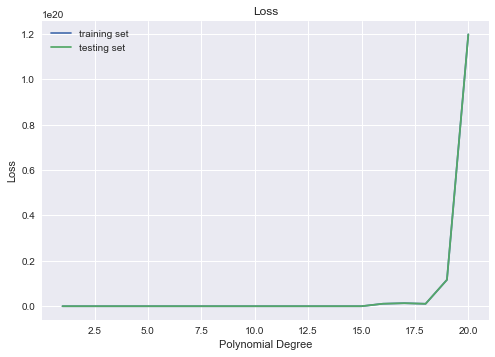

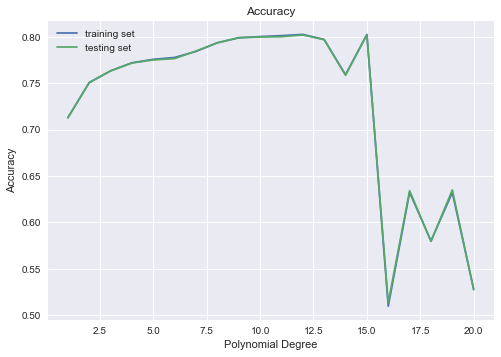

In [20]:
degrees = range(1,21)
rmse_tr = np.zeros(len(degrees))
rmse_ts = np.zeros(len(degrees))
pred_tr = np.zeros(len(degrees))
pred_ts = np.zeros(len(degrees))


for ind, degree in enumerate(degrees):
    #train the model
    X_test_poly = build_poly(X_test,degree)
    X_train_poly = build_poly(X_train,degree)
    w = least_squares(y_train, X_train_poly)
    rmse_tr[ind] = (np.sqrt(2 * compute_loss(y_test, X_test_poly, w)))
    pred_tr[ind] = pred_accuracy(predict_labels(w,X_train_poly),y_train)
    
    #test the model
    
    rmse_ts[ind] = (np.sqrt(2 * compute_loss(y_test, X_test_poly, w)))
    pred_ts[ind] = (pred_accuracy(predict_labels(w, X_test_poly),y_test))
    
    # print the update
    print("degree: {d} \t rmse_ts: {a} \t  pred_ts: {b}".format(d = degree, a = rmse_ts[ind], b = pred_ts[ind]))


    

# plot the loss
plt.style.use('seaborn')
plt.plot(degrees,rmse_tr)
plt.plot(degrees,rmse_ts)
plt.title('Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


#plot the accuracy
plt.style.use('seaborn')
plt.plot(degrees,pred_tr)
plt.plot(degrees,pred_ts)
plt.title('Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


Linear regression using ridge regression
===

In [ ]:
lambdas = np.logspace(-5, 0, 15)
rmse = []
pred = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y_train, X_train, lambda_)
    rmse.append(np.sqrt(2 * compute_loss(y_test, X_test, w)))
    pred_y = predict_labels(w, X_test)
    pred.append(pred_accuracy(pred_y,y_test))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse)
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.show()

print(np.max(pred))